In [128]:
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pandas_profiling import ProfileReport
import numpy as np

In [129]:
df = pd.read_csv('data/data_Inmeta.csv', sep=';', header=0)
df.head(20)

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,13500,23,46986,1.0,90,1,0,2000,3,1165
1,13750,23,72937,1.0,90,1,0,2000,3,1165
2,13950,24,41711,1.0,90,1,0,2000,3,1165
3,14950,26,48000,1.0,90,0,0,2000,3,1165
4,13750,30,38500,1.0,90,0,0,2000,3,1170
5,12950,32,61000,1.0,90,0,0,2000,3,1170
6,16900,27,94612,1.0,90,1,0,2000,3,1245
7,18600,30,75889,1.0,90,1,0,2000,3,1245
8,21500,27,19700,0.0,192,0,0,1800,3,1185
9,12950,23,71138,1.0,69,0,0,1900,3,1105


# Exploratory Data Analysis

In [130]:
print(df.describe())
print(df.info())

                  Y    Feature 1      Feature 2   Feature 3    Feature 4  \
count   1436.000000  1436.000000    1436.000000  414.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749    0.173913   101.502089   
std     3626.964585    18.599988   37506.448872    0.379493    14.981080   
min     4350.000000     1.000000       1.000000    0.000000    69.000000   
25%     8450.000000    44.000000   43000.000000    0.000000    90.000000   
50%     9900.000000    61.000000   63389.500000    0.000000   110.000000   
75%    11950.000000    70.000000   87020.750000    0.000000   110.000000   
max    32500.000000    80.000000  243000.000000    1.000000   192.000000   

         Feature 5    Feature 6    Feature 7    Feature 8   Feature 9  
count  1436.000000  1436.000000  1436.000000  1436.000000  1436.00000  
mean      0.674791     0.055710  1566.827994     4.033426  1072.45961  
std       0.468616     0.229441   187.182436     0.952677    52.64112  
min       0.000000     0.00

* Binary features: 3, 5, 6 
* Mising values: 3

<AxesSubplot:>

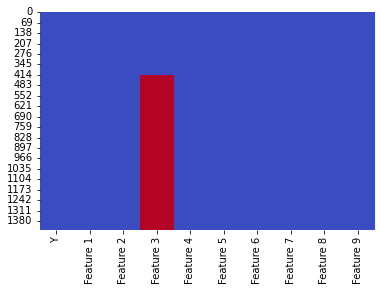

In [131]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)

<AxesSubplot:>

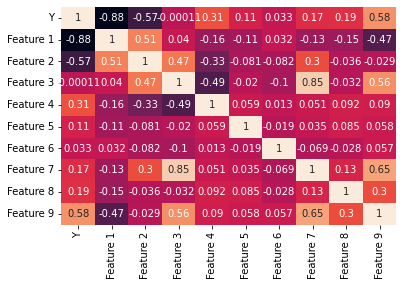

In [132]:
sns.heatmap(df.corr(), annot=True, cbar=False)

In [133]:
# Find the duplications
df[df.duplicated(keep=False)]

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
112,24950,8,13253,1.0,116,1,0,2000,5,1320
113,24950,8,13253,1.0,116,1,0,2000,5,1320


22250.0


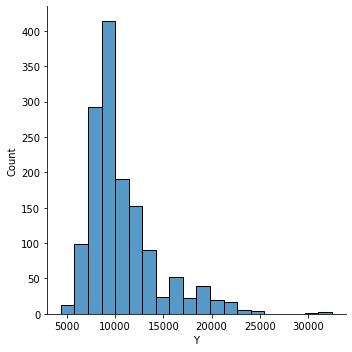

In [134]:
sns.displot(df['Y'], bins=20)
print(np.percentile(df['Y'], q=99))

In [135]:
# # Pandas profiling
# profile = ProfileReport(df)
# profile

# Data Preprocessing

In [136]:
# Drop column feature 3
df_clean = df.drop('Feature 3', axis=1)
# Drop duplicates
df_clean = df_clean.drop_duplicates(keep='first')

In [137]:
print('Missing values by column: ', df_clean.isnull().any())
print('No duplicate ', df_clean.duplicated().any())

Missing values by column:  Y            False
Feature 1    False
Feature 2    False
Feature 4    False
Feature 5    False
Feature 6    False
Feature 7    False
Feature 8    False
Feature 9    False
dtype: bool
No duplicate  False


In [138]:
threshold = np.percentile(df_clean['Y'], q=99)

# threshold = np.mean(df_clean['Y']) + np.std(df_clean['Y'])
# threshold = 30000
print('threshold ', threshold)
df_clean = df_clean[df_clean['Y'] <= threshold]
print('Shape after filter ', df_clean.shape)

threshold  22250.0
Shape after filter  (1422, 9)


In [139]:
# Train test split
X = df_clean.drop('Y', axis=1)
# X = np.array(df_clean['Feature 1']).reshape(-1, 1)
y = df_clean['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Utils

In [140]:
#Visualization code

def vis(y_test, y_pred):

    # Distribution on the line
    fig, ax = plt.subplots(3, 1, figsize=(20,20))
    ax[0].scatter(y_pred, y_test, color='red')
    ax[0].set_xlabel('Predictions', fontsize = 15)
    ax[0].set_ylabel('Ground truths', fontsize = 15)
    ax[0].set_title('Predictions x Ground truths on dataset', fontsize = 15)
    ax[0].plot([0, max(y_test)], [0, max(y_test)], 'g--')

    # Scatter overlapping
    x = range(len(y_test))
    ax[1].scatter(x, y_test, color='blue', label='Ground truth', marker='o')
    ax[1].scatter(x, y_pred, color='green', label='Predictions', marker='x')
    ax[1].legend(loc='upper right')
    ax[1].set_title('Scatter plot of ground truth and prediction', fontsize = 15)

    # Residual histogram
    sns.histplot(abs(y_pred - y_test), ax=ax[2], bins=10)
    ax[2].set_title('Residuals distribution', fontsize = 15)
    
    print('RMSE', mean_squared_error(y_test, y_pred, squared=False))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('r2_score: ', r2_score(y_test, y_pred))


    plt.show()
    

In [141]:
def read_cv_test_result(cv_dict, cv=5):
    
    for key in cv_dict.keys():
        if key.startswith('test'):
            print('Average {}-fold '.format(cv)+key)
            print(cv_dict[key].mean())
    
    print(pd.DataFrame(cv_dict).head(20))

# Data modelling

In [142]:
cv_scoring_metrics = ('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error')
folds = KFold(n_splits=5, shuffle=True, random_state=123)

## LR

RMSE 1370.55635421824
MSE: 1878424.7200879932
MAE:  1036.1376479766354
r2_score:  0.8414686586053268


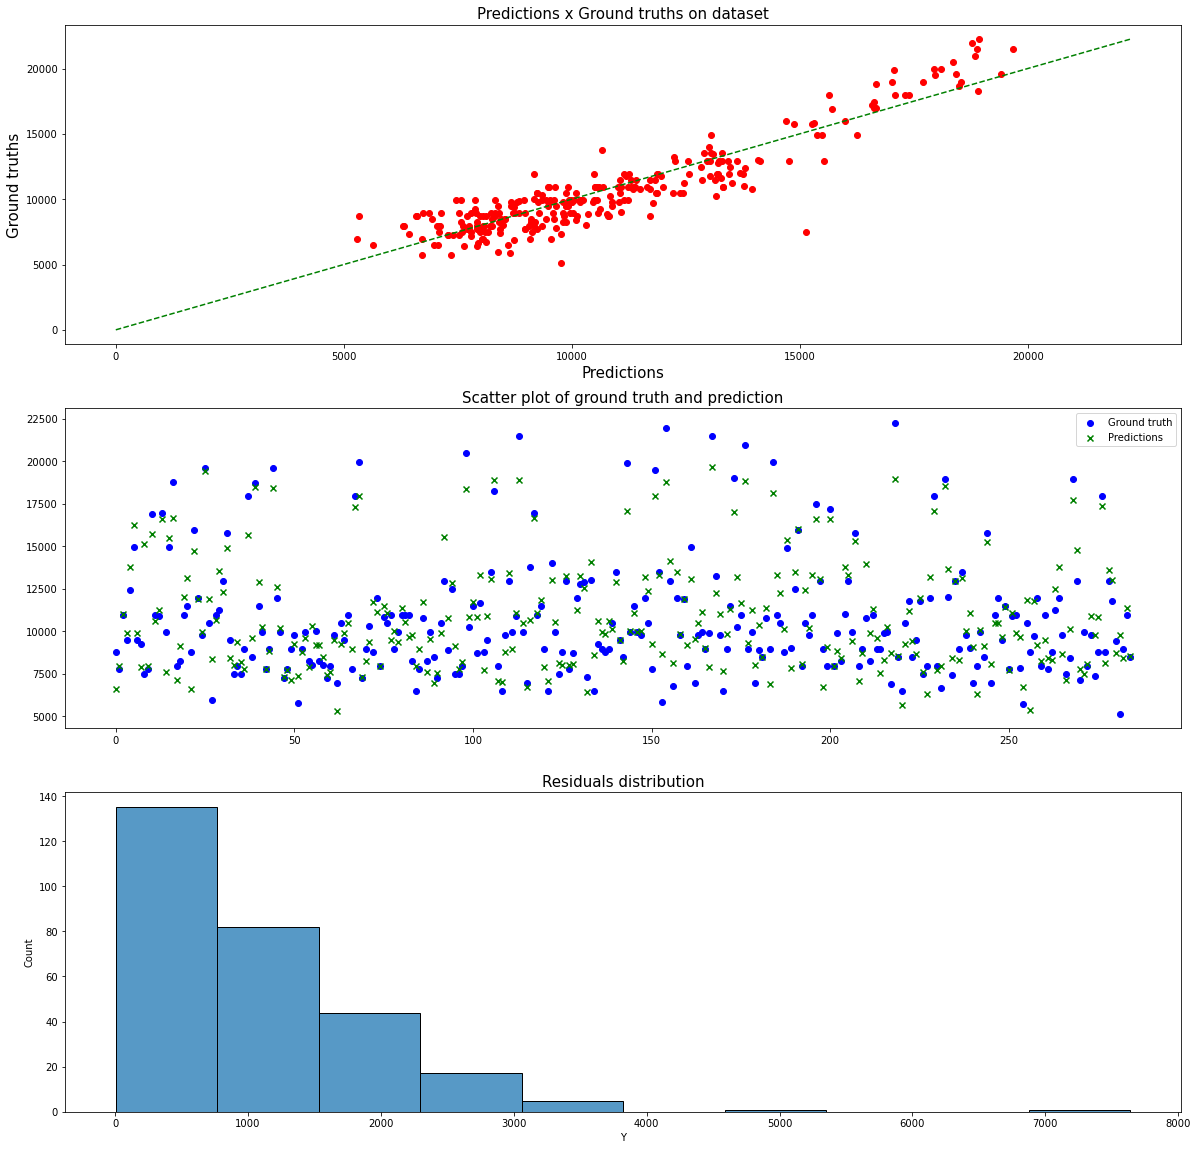

In [143]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
vis(y_test, y_predict)

In [144]:
# Cross validation
lr_cv_scores = cross_validate(lr, X, y, cv=folds, scoring=cv_scoring_metrics)
read_cv_test_result(lr_cv_scores)

Average 5-fold test_r2
0.845333439351639
Average 5-fold test_neg_mean_squared_error
-1699557.5306355455
Average 5-fold test_neg_mean_absolute_error
-953.9738695143624
Average 5-fold test_neg_root_mean_squared_error
-1300.7129657243343
   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.001933    0.001405  0.841469                -1.878425e+06   
1  0.001631    0.001066  0.836170                -1.793043e+06   
2  0.001083    0.000998  0.869064                -1.451171e+06   
3  0.001008    0.000988  0.808465                -1.964442e+06   
4  0.000957    0.000912  0.871500                -1.410706e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1036.137648                      -1370.556354  
1                   -951.397820                      -1339.045701  
2                   -942.889805                      -1204.645615  
3                   -916.632054                      -1401.585687  
4                   -922.812

## Decision Tree

RMSE 1474.5275806050263
MSE: 2174231.585964912
MAE:  1137.2701754385964
r2_score:  0.8165037724750881


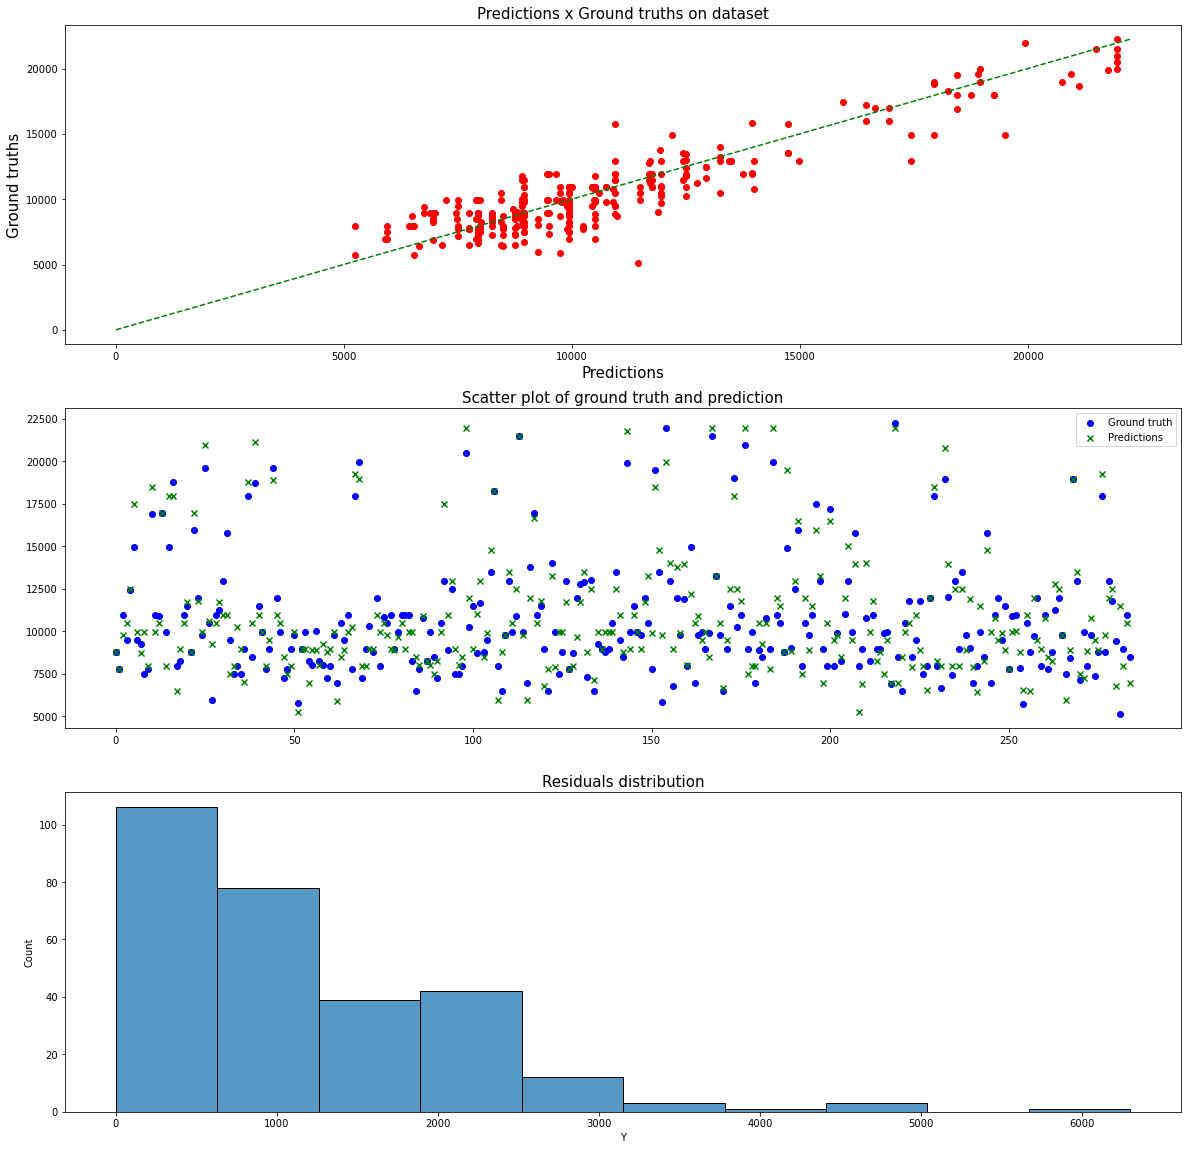

In [145]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dc = DecisionTreeRegressor()
dc.fit(X_train, y_train)
dc_pred = dc.predict(X_test)
vis(y_test, dc_pred)

In [146]:
dc_cv_scores = cross_validate(dc, X, y, cv=folds, scoring=cv_scoring_metrics)
read_cv_test_result(dc_cv_scores)

Average 5-fold test_r2
0.8221359749462884
Average 5-fold test_neg_mean_squared_error
-1961657.29319743
Average 5-fold test_neg_mean_absolute_error
-1084.0479836916234
Average 5-fold test_neg_root_mean_squared_error
-1397.6754993631503
   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.004361    0.001317  0.810836                -2.241392e+06   
1  0.003813    0.001083  0.790143                -2.296790e+06   
2  0.003717    0.001869  0.847405                -1.691220e+06   
3  0.003698    0.001038  0.822001                -1.825612e+06   
4  0.003474    0.000980  0.840295                -1.753272e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                  -1141.270175                      -1497.128013  
1                  -1189.592982                      -1515.516536  
2                  -1034.809859                      -1300.469076  
3                  -1021.288732                      -1351.152255  
4                  -1033.278

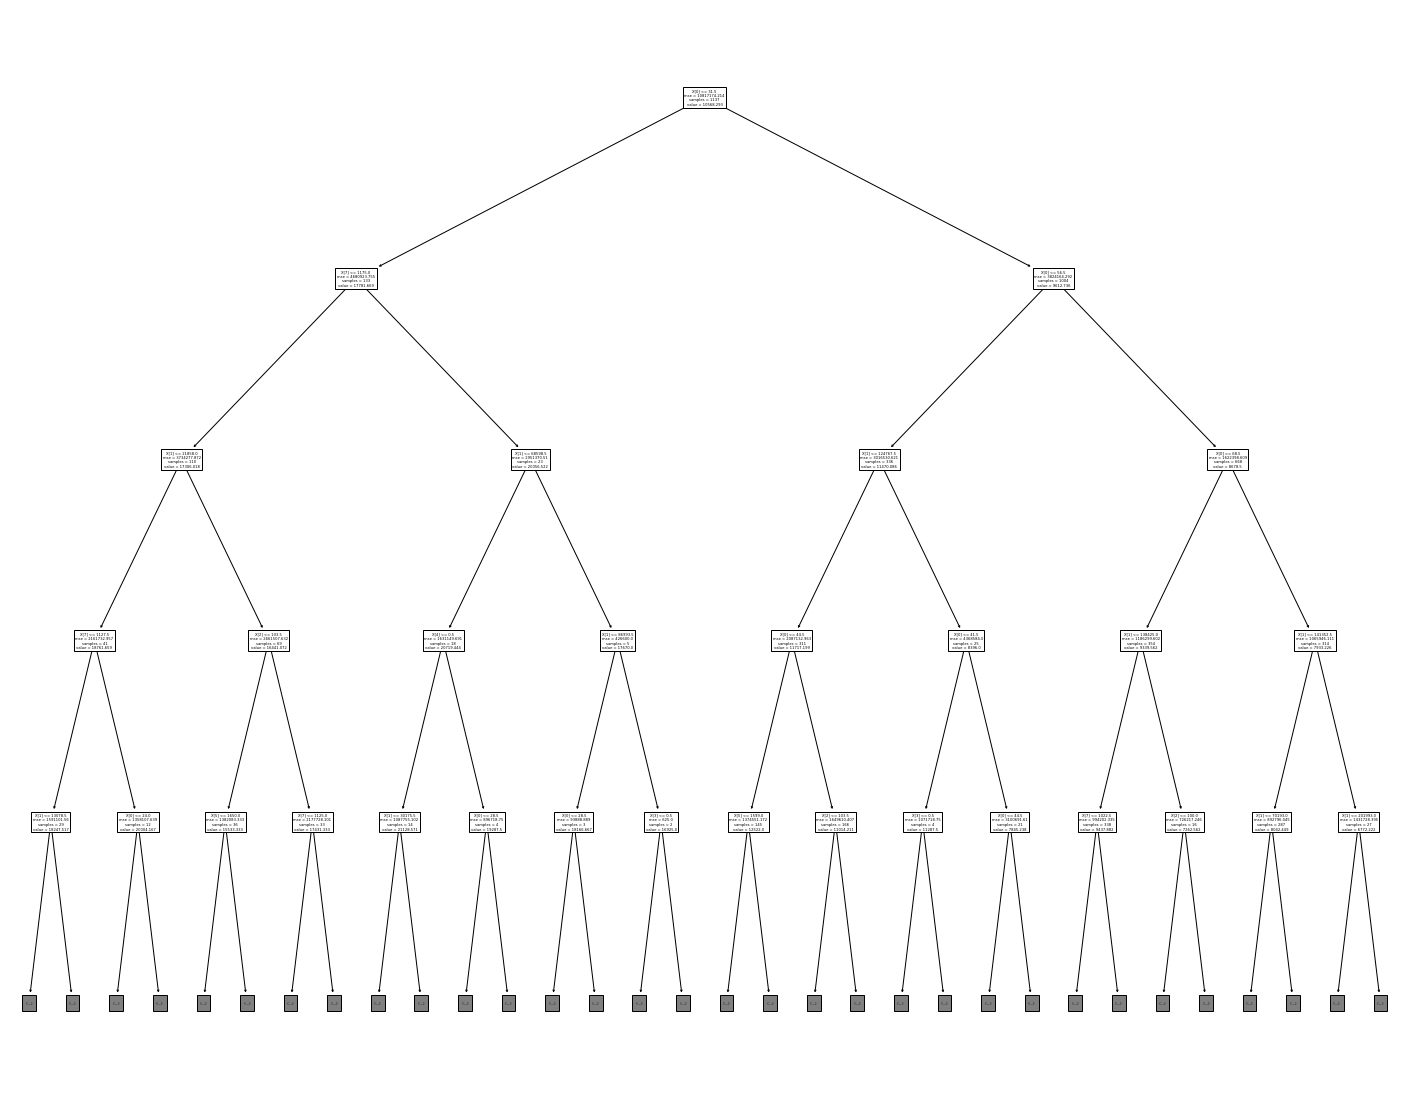

In [147]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dc, max_depth=4)


## Random Forest

RMSE 1139.5091042660708
MSE: 1298480.9987052632
MAE:  871.8213333333334
r2_score:  0.8904135298588929


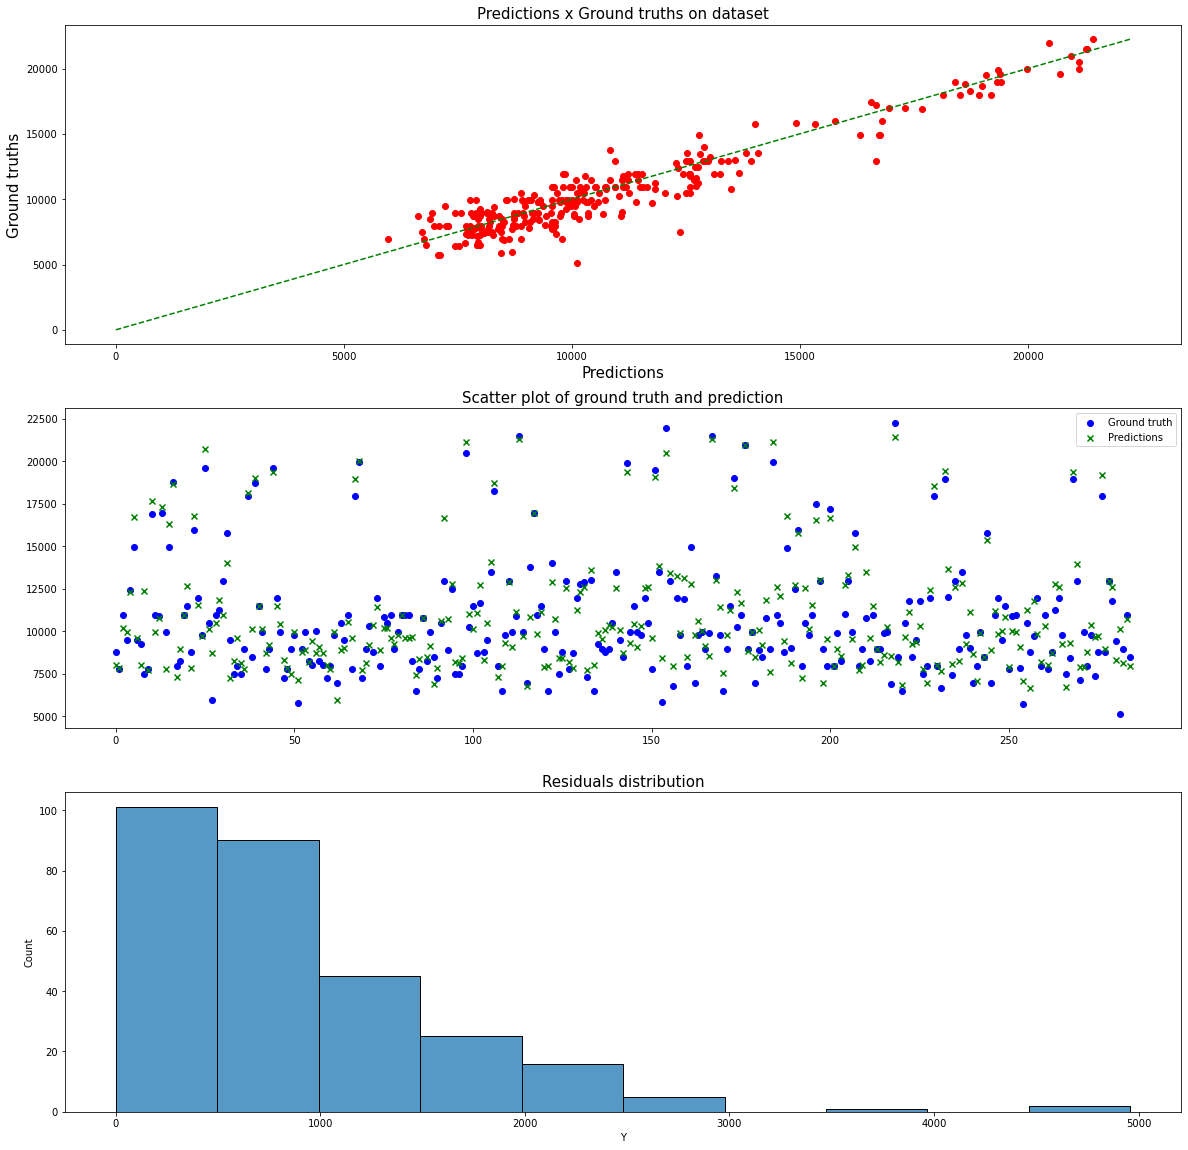

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
vis(y_test, rf_predict)

In [154]:
rf_cv_scores = cross_validate(rf, X, y, cv=folds, scoring=cv_scoring_metrics)
read_cv_test_result(rf_cv_scores)

Average 5-fold test_r2
0.8910228701929901
Average 5-fold test_neg_mean_squared_error
-1199847.505291413
Average 5-fold test_neg_mean_absolute_error
-830.5286882793838
Average 5-fold test_neg_root_mean_squared_error
-1093.1930508996215
   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.240084    0.008312  0.887332                -1.334991e+06   
1  0.218745    0.008106  0.873367                -1.385937e+06   
2  0.217003    0.007804  0.907181                -1.028720e+06   
3  0.214914    0.007784  0.880592                -1.224686e+06   
4  0.217473    0.007673  0.906642                -1.024904e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                   -881.878246                      -1155.418125  
1                   -878.234398                      -1177.258053  
2                   -793.321808                      -1014.258576  
3                   -817.869542                      -1106.655306  
4                   -781.339

In [150]:
# feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='bar')

## XGBoost

RMSE 1197.5119539352584
MSE: 1434034.8798178404
MAE:  922.3676500822369
r2_score:  0.8789733383121034


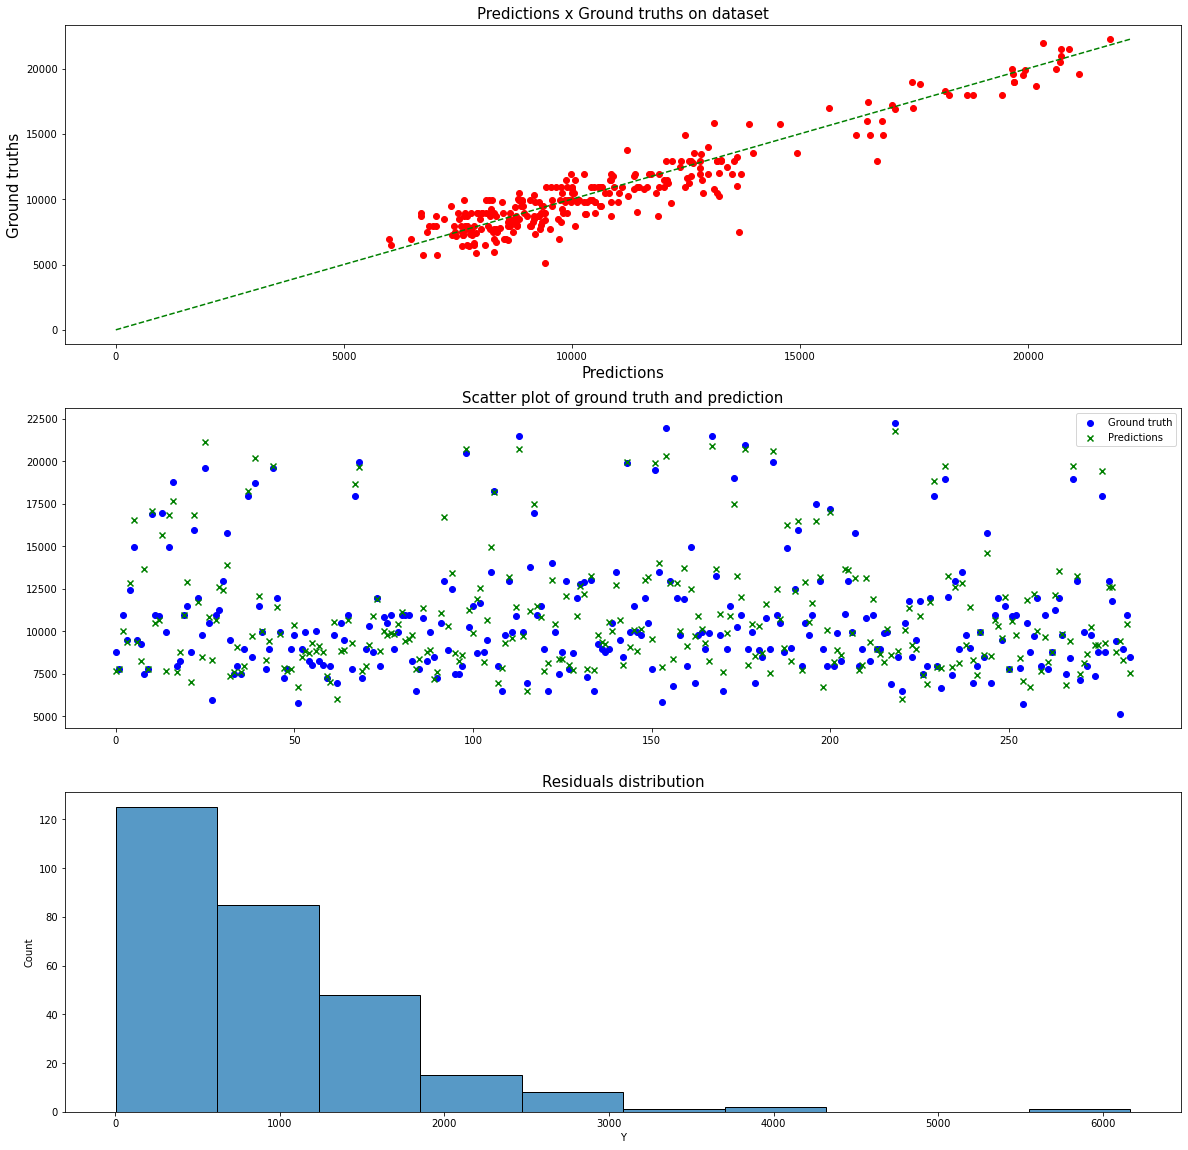

In [151]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
vis(y_test, xg_pred)

<AxesSubplot:>

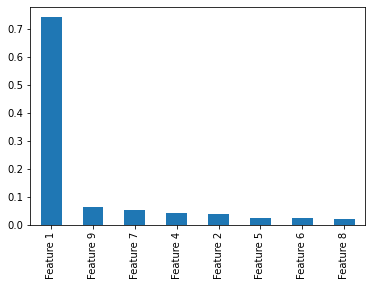

In [152]:
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')

In [153]:
xg_cv_scores = cross_validate(xg, X, y, cv=folds, scoring=cv_scoring_metrics)
read_cv_test_result(xg_cv_scores)

Average 5-fold test_r2
0.8795042712720699
Average 5-fold test_neg_mean_squared_error
-1325634.3097766016
Average 5-fold test_neg_mean_absolute_error
-870.9762244505961
Average 5-fold test_neg_root_mean_squared_error
-1148.8658706603005
   fit_time  score_time   test_r2  test_neg_mean_squared_error  \
0  0.140230    0.002161  0.878973                -1.434035e+06   
1  0.103754    0.003520  0.857830                -1.555987e+06   
2  0.103754    0.003298  0.903221                -1.072604e+06   
3  0.105544    0.002088  0.866041                -1.373921e+06   
4  0.107982    0.002264  0.891456                -1.191625e+06   

   test_neg_mean_absolute_error  test_neg_root_mean_squared_error  
0                   -922.367650                      -1197.511954  
1                   -916.965896                      -1247.392251  
2                   -809.608661                      -1035.665752  
3                   -870.147225                      -1172.143757  
4                   -835.79